# Lab 1.3: Exploratory Data Analysis (EDA) with Pandas

## Outline

* Introduction to Pandas
* EDA using Pandas

Exploratory data analysis is a first crucial step to building predictive models from your data. EDA allows you
to confirm or invalidate some of the assumptions you are making about your data and understand relationships between your variables.

## Getting Started with [Pandas](http://pandas.pydata.org/pandas-docs/version/0.17.1/)

### What is Pandas?
A Python library providing data structures and data analysis tools.

### Huh?
Think of it like Excel for Python but better.

In [2]:
#By convention import pandas like:
import pandas as pd

In [3]:
#For fake data.
from numpy.random import randn
import numpy as np

## Series
Think of a Pandas Series as a _labeled_ one-dimensional vector. In fact, it need not be a numeric vector, it can contain arbitrary python objects.

In [76]:
int_series = pd.Series(range(10))
int_series.head()

0    0
1    1
2    2
3    3
4    4
dtype: int64

In [77]:
num_series = pd.Series(randn(10))
num_series.head()

0   -1.001748
1   -0.546457
2    0.600147
3    0.005437
4   -1.465920
dtype: float64

In [78]:
str_series = pd.Series([x for x in 'abcde'*2])
str_series.head()

0    a
1    b
2    c
3    d
4    e
dtype: object

## Indexes
Notice how each series has an index (in this case a relatively meaningless default index).

Pandas can make great use of informative indexes. Indexes work similarly to a dictionary key, allowing fast lookups of the data associated with the index.

Indexes can also be exploited for fast group-bys, merges, time-series operations and lots more.

When you're really in the zone with pandas, you'll be thinking a lot about indexes.

In [79]:
indexed_series = pd.Series(randn(5), 
                           index = ['California', 'Alabama', 
                                    'Indiana', 'Montana', 
                                    'Kentucky'])
alt_indexed_series = pd.Series(randn(5),
                               index = ['Washington', 'Alabama', 
                                        'Montana', 'Indiana', 
                                        'New York'])
print indexed_series
print '\n'
print alt_indexed_series

California   -0.185861
Alabama      -1.643737
Indiana       2.246474
Montana       1.017903
Kentucky     -1.333519
dtype: float64


Washington    0.156392
Alabama       0.045746
Montana       1.178002
Indiana       0.490126
New York     -0.528801
dtype: float64


In [80]:
#Pandas uses the index by default to align series for arithmetic!
indexed_series + alt_indexed_series

Alabama      -1.597991
California         NaN
Indiana       2.736600
Kentucky           NaN
Montana       2.195905
New York           NaN
Washington         NaN
dtype: float64

In [81]:
indexed_series = pd.Series(randn(5*10), 
                           index = ['California', 'Alabama', 
                                    'Indiana', 'Montana', 
                                    'Kentucky']*10)
#If you have non-unique indexes, you can use them 
#to do groupby operations.
indexed_series.groupby(level=0).mean()

Alabama       0.086252
California    0.340918
Indiana       0.093891
Kentucky     -0.512961
Montana      -0.364768
dtype: float64

In [82]:
#Datetime index
dt_index = pd.date_range('2015-1-1', 
                        '2015-11-1', 
                        freq='m')
dt_series = pd.Series(randn(10), 
                      index = dt_index)
dt_series

2015-01-31   -1.720479
2015-02-28   -0.284699
2015-03-31    0.370343
2015-04-30    0.022406
2015-05-31   -0.471037
2015-06-30    1.502830
2015-07-31    0.649291
2015-08-31   -0.768706
2015-09-30    0.375093
2015-10-31    1.025331
Freq: M, dtype: float64

In [83]:
#Datetime indexes make it easy to transform freqs etc!
dt_series.resample('q')

2015-03-31   -0.544945
2015-06-30    0.351400
2015-09-30    0.085226
2015-12-31    1.025331
Freq: Q-DEC, dtype: float64

## DataFrames
Data frames extend the concept of Series to table-like data.

In [84]:
df = pd.DataFrame(randn(10, 5), index=dt_index, columns=[x for x in 'abcde'])
df

,a,b,c,d,e
2015-01-31,-0.646665,-1.516299,0.672202,0.361817,0.184314
2015-02-28,0.288597,1.000204,-0.845465,0.645493,0.625918
2015-03-31,-0.053506,-2.075325,1.354301,0.542215,0.079497
2015-04-30,0.031400,1.248604,-0.000919,-0.523628,2.809252
2015-05-31,1.549263,-0.143393,-1.909609,0.999202,0.503049
2015-06-30,-0.385988,-0.354544,1.150908,-1.036773,-0.030490
2015-07-31,-0.591909,0.139773,1.025645,-0.154051,0.090022
2015-08-31,0.660947,0.241219,-1.046322,0.968137,-0.801387
2015-09-30,0.665029,-0.256776,-2.399586,0.673891,-0.213504
2015-10-31,-0.510352,0.528574,-0.936941,-0.892964,-1.784816


In [85]:
#A dataframes columns are series:
col = df.a
type(col)

pandas.core.series.Series

In [86]:
#So are the rows.
row = df.ix['2015-01-31']
type(row)

pandas.core.series.Series

In [87]:
#The columns all have the same index:
col.index   

DatetimeIndex(['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31'],
              dtype='datetime64[ns]', freq='M', tz=None)

In [88]:
#What's the index for the rows?
row.index

Index([u'a', u'b', u'c', u'd', u'e'], dtype='object')

## DataFrame basics

In [89]:
#New column
df['new'] = df['a'] + df['b']
df

,a,b,c,d,e,new
2015-01-31,-0.646665,-1.516299,0.672202,0.361817,0.184314,-2.162964
2015-02-28,0.288597,1.000204,-0.845465,0.645493,0.625918,1.288801
2015-03-31,-0.053506,-2.075325,1.354301,0.542215,0.079497,-2.128831
2015-04-30,0.031400,1.248604,-0.000919,-0.523628,2.809252,1.280003
2015-05-31,1.549263,-0.143393,-1.909609,0.999202,0.503049,1.405870
2015-06-30,-0.385988,-0.354544,1.150908,-1.036773,-0.030490,-0.740531
2015-07-31,-0.591909,0.139773,1.025645,-0.154051,0.090022,-0.452136
2015-08-31,0.660947,0.241219,-1.046322,0.968137,-0.801387,0.902166
2015-09-30,0.665029,-0.256776,-2.399586,0.673891,-0.213504,0.408253
2015-10-31,-0.510352,0.528574,-0.936941,-0.892964,-1.784816,0.018222


In [90]:
#Delete a column
df.drop('new', axis=1)

,a,b,c,d,e
2015-01-31,-0.646665,-1.516299,0.672202,0.361817,0.184314
2015-02-28,0.288597,1.000204,-0.845465,0.645493,0.625918
2015-03-31,-0.053506,-2.075325,1.354301,0.542215,0.079497
2015-04-30,0.031400,1.248604,-0.000919,-0.523628,2.809252
2015-05-31,1.549263,-0.143393,-1.909609,0.999202,0.503049
2015-06-30,-0.385988,-0.354544,1.150908,-1.036773,-0.030490
2015-07-31,-0.591909,0.139773,1.025645,-0.154051,0.090022
2015-08-31,0.660947,0.241219,-1.046322,0.968137,-0.801387
2015-09-30,0.665029,-0.256776,-2.399586,0.673891,-0.213504
2015-10-31,-0.510352,0.528574,-0.936941,-0.892964,-1.784816


## Axis?
Because pandas thinks of rows and columns as both being series, anything we can do to rows we can do to columns too. 

Axis describes which one we want to do it to. 0=rows, 1=columns.

In [91]:
lbl = pd.Timestamp('2015-04-30 00:00:00', offset='M')
df.drop(lbl, axis=0)

,a,b,c,d,e,new
2015-01-31,-0.646665,-1.516299,0.672202,0.361817,0.184314,-2.162964
2015-02-28,0.288597,1.000204,-0.845465,0.645493,0.625918,1.288801
2015-03-31,-0.053506,-2.075325,1.354301,0.542215,0.079497,-2.128831
2015-05-31,1.549263,-0.143393,-1.909609,0.999202,0.503049,1.405870
2015-06-30,-0.385988,-0.354544,1.150908,-1.036773,-0.030490,-0.740531
2015-07-31,-0.591909,0.139773,1.025645,-0.154051,0.090022,-0.452136
2015-08-31,0.660947,0.241219,-1.046322,0.968137,-0.801387,0.902166
2015-09-30,0.665029,-0.256776,-2.399586,0.673891,-0.213504,0.408253
2015-10-31,-0.510352,0.528574,-0.936941,-0.892964,-1.784816,0.018222


## Selecting subsets
There a couple of ways to select a subset of a python data frame.

In [92]:
#To subset the rows, you can use the convenient:
df[df.a > 0]

,a,b,c,d,e,new
2015-02-28,0.288597,1.000204,-0.845465,0.645493,0.625918,1.288801
2015-04-30,0.031400,1.248604,-0.000919,-0.523628,2.809252,1.280003
2015-05-31,1.549263,-0.143393,-1.909609,0.999202,0.503049,1.405870
2015-08-31,0.660947,0.241219,-1.046322,0.968137,-0.801387,0.902166
2015-09-30,0.665029,-0.256776,-2.399586,0.673891,-0.213504,0.408253


In [93]:
#Or combine multiple conditions:
df[(df.a > 0) & (df.c < 0)]

,a,b,c,d,e,new
2015-02-28,0.288597,1.000204,-0.845465,0.645493,0.625918,1.288801
2015-04-30,0.031400,1.248604,-0.000919,-0.523628,2.809252,1.280003
2015-05-31,1.549263,-0.143393,-1.909609,0.999202,0.503049,1.405870
2015-08-31,0.660947,0.241219,-1.046322,0.968137,-0.801387,0.902166
2015-09-30,0.665029,-0.256776,-2.399586,0.673891,-0.213504,0.408253


In [94]:
#Selecting a column
df.a
#Works sometimes.

2015-01-31   -0.646665
2015-02-28    0.288597
2015-03-31   -0.053506
2015-04-30    0.031400
2015-05-31    1.549263
2015-06-30   -0.385988
2015-07-31   -0.591909
2015-08-31    0.660947
2015-09-30    0.665029
2015-10-31   -0.510352
Freq: M, Name: a, dtype: float64

In [95]:
df['a'] #works always

2015-01-31   -0.646665
2015-02-28    0.288597
2015-03-31   -0.053506
2015-04-30    0.031400
2015-05-31    1.549263
2015-06-30   -0.385988
2015-07-31   -0.591909
2015-08-31    0.660947
2015-09-30    0.665029
2015-10-31   -0.510352
Freq: M, Name: a, dtype: float64

In [96]:
df[['a', 'b']]
#Or a subset of columns

,a,b
2015-01-31,-0.646665,-1.516299
2015-02-28,0.288597,1.000204
2015-03-31,-0.053506,-2.075325
2015-04-30,0.031400,1.248604
2015-05-31,1.549263,-0.143393
2015-06-30,-0.385988,-0.354544
2015-07-31,-0.591909,0.139773
2015-08-31,0.660947,0.241219
2015-09-30,0.665029,-0.256776
2015-10-31,-0.510352,0.528574


## Advanced selection
The above methods work for simple types of selections, but what if you need something more complex?

In [97]:
df.loc['2015-05-31':'2015-08-31', 'c':'e'] #Ranges by label.

,c,d,e
2015-05-31,-1.909609,0.999202,0.503049
2015-06-30,1.150908,-1.036773,-0.030490
2015-07-31,1.025645,-0.154051,0.090022
2015-08-31,-1.046322,0.968137,-0.801387


In [98]:
df.iloc[2:-3,2:5] #Ranges by number.

,c,d,e
2015-03-31,1.354301,0.542215,0.079497
2015-04-30,-0.000919,-0.523628,2.809252
2015-05-31,-1.909609,0.999202,0.503049
2015-06-30,1.150908,-1.036773,-0.030490
2015-07-31,1.025645,-0.154051,0.090022


In [99]:
#SQL-like queries for parsimonious row selection.
#Experimental
df.query('a > 1 and c <1')

,a,b,c,d,e,new
2015-05-31,1.549263,-0.143393,-1.909609,0.999202,0.503049,1.40587


In [100]:
#Multi Index:
dt_index = pd.date_range('2015-1-1', 
                        '2017-7-1', 
                        freq='m')
df = pd.DataFrame(randn(30,5), index=dt_index)

In [101]:
df['state'] = ['Alabama', 'Alaska' , 'Arizona'] * 10
df.head()

,0,1,2,3,4,state
2015-01-31,-0.276277,-1.129156,0.018065,0.388795,0.370187,Alabama
2015-02-28,-0.616410,1.040599,-1.659621,-0.211935,-0.142764,Alaska
2015-03-31,0.268415,0.451532,-0.567158,-0.436949,-1.817945,Arizona
2015-04-30,1.762384,-1.896485,1.800928,0.872635,0.171109,Alabama
2015-05-31,-0.679139,0.558755,1.039731,-0.741526,-0.026062,Alaska


In [102]:
df = df.reset_index()
df = df.set_index(['state', 'index'])
df.head()

,,0,1,2,3,4
state,index,,,,,
Alabama,2015-01-31,-0.276277,-1.129156,0.018065,0.388795,0.370187
Alaska,2015-02-28,-0.616410,1.040599,-1.659621,-0.211935,-0.142764
Arizona,2015-03-31,0.268415,0.451532,-0.567158,-0.436949,-1.817945
Alabama,2015-04-30,1.762384,-1.896485,1.800928,0.872635,0.171109
Alaska,2015-05-31,-0.679139,0.558755,1.039731,-0.741526,-0.026062


In [103]:
df.loc['Alabama'].head()

,0,1,2,3,4
index,,,,,
2015-01-31,-0.276277,-1.129156,0.018065,0.388795,0.370187
2015-04-30,1.762384,-1.896485,1.800928,0.872635,0.171109
2015-07-31,-1.260763,0.608042,-0.736403,-1.419251,-0.212107
2015-10-31,-2.155006,-2.856903,-1.695338,-1.679117,-1.575889
2016-01-31,0.521235,0.726037,1.250589,0.219159,1.035014


In [104]:
df.loc['2015-01-31'] #Doesn't work.

KeyError: 'the label [2015-01-31] is not in the [index]'

In [105]:
df.loc[('Alabama', '2015-01-31')] #Can do this.

0   -0.276277
1   -1.129156
2    0.018065
3    0.388795
4    0.370187
Name: (Alabama, 2015-01-31 00:00:00), dtype: float64

In [106]:
#Can also have multi-index in columns.
df.reset_index().set_index(['index', 'state']).unstack().head()

0                             1                      \
state        Alabama    Alaska   Arizona   Alabama    Alaska   Arizona   
index                                                                    
2015-01-31 -0.276277       NaN       NaN -1.129156       NaN       NaN   
2015-02-28       NaN -0.616410       NaN       NaN  1.040599       NaN   
2015-03-31       NaN       NaN  0.268415       NaN       NaN  0.451532   
2015-04-30  1.762384       NaN       NaN -1.896485       NaN       NaN   
2015-05-31       NaN -0.679139       NaN       NaN  0.558755       NaN   

                   2                             3                      \
state        Alabama    Alaska   Arizona   Alabama    Alaska   Arizona   
index                                                                    
2015-01-31  0.018065       NaN       NaN  0.388795       NaN       NaN   
2015-02-28       NaN -1.659621       NaN       NaN -0.211935       NaN   
2015-03-31       NaN       NaN -0.567158       NaN       NaN -0.436949   
2015-04-30  1.800928       NaN       NaN  0.872635       NaN       NaN   
2015-05-31       NaN  1.039731       NaN       NaN -0.741526       NaN   

                   4                      
state        Alabama    Alaska   Arizona  
index                                     
2015-01-31  0.370187       NaN       NaN  
2015-02-28       NaN -0.142764       NaN  
2015-03-31       NaN       NaN -1.817945  
2015-04-30  0.171109       NaN       NaN  
2015-05-31       NaN -0.026062       NaN

In [107]:
df.head()

,,0,1,2,3,4
state,index,,,,,
Alabama,2015-01-31,-0.276277,-1.129156,0.018065,0.388795,0.370187
Alaska,2015-02-28,-0.616410,1.040599,-1.659621,-0.211935,-0.142764
Arizona,2015-03-31,0.268415,0.451532,-0.567158,-0.436949,-1.817945
Alabama,2015-04-30,1.762384,-1.896485,1.800928,0.872635,0.171109
Alaska,2015-05-31,-0.679139,0.558755,1.039731,-0.741526,-0.026062


## split-apply-combine

In [108]:
df.groupby(level=1).mean().head()

,0,1,2,3,4
index,,,,,
2015-01-31,-0.276277,-1.129156,0.018065,0.388795,0.370187
2015-02-28,-0.616410,1.040599,-1.659621,-0.211935,-0.142764
2015-03-31,0.268415,0.451532,-0.567158,-0.436949,-1.817945
2015-04-30,1.762384,-1.896485,1.800928,0.872635,0.171109
2015-05-31,-0.679139,0.558755,1.039731,-0.741526,-0.026062


In [109]:
df.groupby(level=0).mean().head() #Groupby index

,0,1,2,3,4
state,,,,,
Alabama,-0.335061,-0.196078,0.049048,0.134708,-0.092447
Alaska,-0.231166,-0.319637,0.074386,-0.471860,-0.092000
Arizona,-0.672771,0.164090,-0.202312,-0.195016,-0.199921


In [110]:
#Groupby doesn't have to be on index.
df.reset_index().groupby('state').mean().head()
#'state' could be a list of columns to group on.

,0,1,2,3,4
state,,,,,
Alabama,-0.335061,-0.196078,0.049048,0.134708,-0.092447
Alaska,-0.231166,-0.319637,0.074386,-0.471860,-0.092000
Arizona,-0.672771,0.164090,-0.202312,-0.195016,-0.199921


In [111]:
#Apply
g = df.groupby(level=0)

In [112]:
#If one row for each index.
g.aggregate(np.mean)

,0,1,2,3,4
state,,,,,
Alabama,-0.335061,-0.196078,0.049048,0.134708,-0.092447
Alaska,-0.231166,-0.319637,0.074386,-0.471860,-0.092000
Arizona,-0.672771,0.164090,-0.202312,-0.195016,-0.199921


In [113]:
#If same shape as original:
g.transform(lambda x: (x - x.mean())/x.std()).head()

,,0,1,2,3,4
state,index,,,,,
Alabama,2015-01-31,0.049011,-0.690353,-0.026121,0.248434,0.546584
Alaska,2015-02-28,-0.501175,1.166153,-1.392110,0.233751,-0.041532
Arizona,2015-03-31,0.909802,0.226046,-0.518050,-0.285322,-1.562442
Alabama,2015-04-30,1.748731,-1.258073,1.476967,0.721510,0.311381
Alaska,2015-05-31,-0.582780,0.753060,0.775006,-0.242510,0.053945


In [114]:
#Different index than I started with.
g.apply(lambda x: x.describe()).head(12)

0          1          2          3          4
state                                                               
Alabama count  10.000000  10.000000  10.000000  10.000000  10.000000
        mean   -0.335061  -0.196078   0.049048   0.134708  -0.092447
        std     1.199409   1.351596   1.186134   1.022754   0.846408
        min    -2.155006  -2.856903  -1.695338  -1.679117  -1.575889
        25%    -1.255954  -0.873399  -0.659794  -0.094576  -0.282683
        50%    -0.316135   0.295044  -0.233905   0.303977   0.077042
        75%     0.434184   0.635486   0.942458   0.764984   0.323916
        max     1.762384   1.459088   1.800928   1.654697   1.035014
Alaska  count  10.000000  10.000000  10.000000  10.000000  10.000000
        mean   -0.231166  -0.319637   0.074386  -0.471860  -0.092000
        std     0.768682   1.166431   1.245596   1.111976   1.222313
        min    -1.502360  -2.472056  -1.659621  -2.496344  -1.700483

## Reading and writing data

In [ ]:
df.to_csv('saved_data.csv', delimiter='\t')

In [ ]:
read = pd.read_csv('saved_data.csv', delimiter='\t')
#TONS OF options for reading data

"""Other methods:
pd.read_excel
pd.read_sql
pd.read_stata
...
"""

## Other very useful things

join, concat and merge

In [ ]:
state_df = pd.DataFrame({'governor':['Robert Bentley',
                                    'Bill Walker',
                                    'Doug Ducey',
                                    'Asa Hutchinson']}, 
                        index=['Alabama', 'Alaska', 'Arizona', 'Arkansas'])
#Note merge is most useful when you want to merge on something other than the index.
#Default is to merge on common column names.
pd.merge(df.reset_index(), state_df, 
         left_on='state', right_index=True, how='right').tail()

In [ ]:
state_avg = df.groupby(level=0).mean()
state_avg.head()

In [ ]:
#Concat allows joining along the axes.
pd.concat([state_avg, state_df], axis=1)

In [ ]:
#Join also works. Just like merge, but 
#default is to join on indexes.
state_avg.join(state_df, how='right')

## Exploratory Data Analysis with Pandas

In [ ]:
%pylab inline

In [ ]:
df = pd.read_csv('data/playgolf.csv', delimiter='|' )
print df.head()

## Describe the continuous variables
### This treats the Boolean Windy variable as a series of 0's and 1's

In [ ]:
df.describe()

Can see the general pattern of Temperature and Humidity and mean of a Boolean represents the percentage

### We can make use of df.plot() to produce simple graphs that calls on the more adjustable [Matplotlib](http://matplotlib.org/api/pyplot_api.html) library 

In [ ]:
df.hist(['Temperature','Humidity'],bins=5)

In [ ]:
df[['Temperature','Humidity']].plot(kind='box')

### Scatterplots for examining bivariate relationships

In [ ]:
df.plot('Temperature', 'Humidity', kind='scatter')

## What about the categorical variables? Frequency tables and relative frequency tables

### Simply df.value_counts() gets you the frequencies

In [ ]:
df['Outlook'].value_counts()

### Using apply will get you the value counts for multiple columns at once

In [ ]:
df[['Outlook','Result']].apply(lambda x: x.value_counts())

### Contingency Tables for looking at bivariate relationships between two categorical variables

In [ ]:
pd.crosstab(df['Outlook'], df['Result'])

### Often we want the row percentages

In [ ]:
pd.crosstab(df['Outlook'], df['Result']).apply(lambda r: r/r.sum(), axis=1)

### Or the column percentages

In [ ]:
pd.crosstab(df['Outlook'], df['Result']).apply(lambda c: c/c.sum(), axis=0)

## Lab Exercises [GRADED]

In this scenario, you are a data scientist at [Bay Area Bike Share](http://www.bayareabikeshare.com/). Your task
is to provide insights on bike user activity and behavior to the products team. 


1. Load the `trips` table into a dataframe. 
   
   Make 4 extra columns from the `start_date` column (We will use these in later questions):
   - `month` would contain only the month component
   - `dayofweek` would indicate what day of the week the date is
   - `date` would contain only the date component 
   - `hour` would only contain the hour component
   - [Hint to deal with datetime objects in pandas](http://stackoverflow.com/questions/25129144/pandas-return-hour-from-datetime-column-directly)

2. Group the bike rides by `month` and count the number of users per month. Plot the number of users for each month. 
   What do you observe? Provide a likely explanation to your observation. Real life data can often be messy/incomplete
   and cursory EDA is often able to reveal that.
   
3. Plot the daily user count from September to December. Mark the `mean` and `mean +/- 1.5 * Standard Deviation` as 
   horizontal lines on the plot. This would help you identify the outliers in your data. Describe your observations. 
   
   ![image](images/timeseries.png)

4. Plot the distribution of the daily user counts for all months as a histogram. Comment on the distribution you see and explain why the distribution might be shaped as such. 
    
   <img src="images/hist.png" width="500">
  
5. Now we are going to explore hourly trends of user activity. Group the bike rides by `date` and `hour` and count 
   the number of rides in the given hour on the given date. Make a 
   [boxplot](http://blog.bharatbhole.com/creating-boxplots-with-matplotlib/) of the hours in the day **(x)** against
   the number of users **(y)** in that given hour. 
   
6. Someone from the analytics team made a line plot (_right_) that he claims is showing the same information as your
   boxplot (_left_). What information can you gain from the boxplot that is missing in the line plot?
   
   ![image](images/q1_pair.png)

7. ** Extra Credit **: Replot the boxplot in `6.` after binning your data into weekday and weekend. Describe the differences you observe between hour user activity between weekday and weekend? 
    

In [1]:
%pylab inline
%load_ext sql
import yaml

Populating the interactive namespace from numpy and matplotlib


//anaconda/lib/python3.5/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
//anaconda/lib/python3.5/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [2]:
pg_creds = yaml.load(open('../../pg_creds.yaml'))['student']
connection_string = 'postgresql://{user}:{password}@{host}:{port}/{dbname}'.format(**pg_creds)

In [3]:
# Creates a connection to our Postgres database
%sql $connection_string

'Connected: student@postgres'

In [4]:
# Loads the data from the trips table into a Pandas DataFrame.
trips_table = %sql SELECT * FROM trips;
trips = trips_table.DataFrame()

144015 rows affected.


In [5]:
trips.head()

,trip_id,duration,start_date,start_station,start_terminal,end_date,end_station,end_terminal,bike_#,subscription_type,zip_code
0,4576,63,2013-08-29 14:13:00,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,2013-08-29 14:42:00,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,2013-08-29 10:16:00,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,2013-08-29 11:29:00,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,2013-08-29 12:02:00,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103


In [8]:
trips.describe()

,trip_id,duration,start_terminal,end_terminal,bike_#
count,144015.000000,144015.000000,144015.000000,144015.000000,144015.000000
mean,100967.962129,1230.910141,57.298420,57.352908,437.029407
std,56121.284410,6652.962329,17.132203,17.101324,138.076365
min,4069.000000,60.000000,2.000000,2.000000,9.000000
25%,52138.500000,349.000000,50.000000,50.000000,349.000000
50%,99969.000000,531.000000,61.000000,61.000000,446.000000
75%,150090.500000,797.000000,70.000000,70.000000,546.000000
max,198775.000000,722236.000000,83.000000,83.000000,717.000000


In [11]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144015 entries, 0 to 144014
Data columns (total 11 columns):
trip_id              144015 non-null int64
duration             144015 non-null int64
start_date           144015 non-null datetime64[ns]
start_station        144015 non-null object
start_terminal       144015 non-null int64
end_date             144015 non-null object
end_station          144015 non-null object
end_terminal         144015 non-null int64
bike_#               144015 non-null int64
subscription_type    144015 non-null object
zip_code             137885 non-null object
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 12.1+ MB


In [44]:
del trips['month']
del trips['date']
del trips['hour']
del trips['dayofweek']

In [45]:
# http://pandas.pydata.org/pandas-docs/stable/timeseries.html
# http://pandas.pydata.org/pandas-docs/stable/dsintro.html#column-selection-addition-deletion
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DatetimeIndex.dayofweek.html
trips.insert(3,'month', trips['start_date'].apply(lambda x: x.month))
trips.insert(4,'dayofweek', trips['start_date'].apply(lambda x: x.dayofweek))
trips.insert(5,'date', trips['start_date'].apply(lambda x: x.date()))
trips.insert(6,'hour', trips['start_date'].apply(lambda x: x.hour))

In [46]:
trips.head()

,trip_id,duration,start_date,month,dayofweek,date,hour,start_station,start_terminal,end_date,end_station,end_terminal,bike_#,subscription_type,zip_code
0,4576,63,2013-08-29 14:13:00,8,3,2013-08-29,14,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,2013-08-29 14:42:00,8,3,2013-08-29,14,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,2013-08-29 10:16:00,8,3,2013-08-29,10,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,2013-08-29 11:29:00,8,3,2013-08-29,11,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,2013-08-29 12:02:00,8,3,2013-08-29,12,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103


In [47]:
trips.groupby('month').count()

,trip_id,duration,start_date,dayofweek,date,hour,start_station,start_terminal,end_date,end_station,end_terminal,bike_#,subscription_type,zip_code
month,,,,,,,,,,,,,,
1,24428,24428,24428,24428,24428,24428,24428,24428,24428,24428,24428,24428,24428,23789
2,19024,19024,19024,19024,19024,19024,19024,19024,19024,19024,19024,19024,19024,18487
8,2102,2102,2102,2102,2102,2102,2102,2102,2102,2102,2102,2102,2102,1916
9,25243,25243,25243,25243,25243,25243,25243,25243,25243,25243,25243,25243,25243,23377
10,29105,29105,29105,29105,29105,29105,29105,29105,29105,29105,29105,29105,29105,27822
11,24219,24219,24219,24219,24219,24219,24219,24219,24219,24219,24219,24219,24219,23309
12,19894,19894,19894,19894,19894,19894,19894,19894,19894,19894,19894,19894,19894,19185


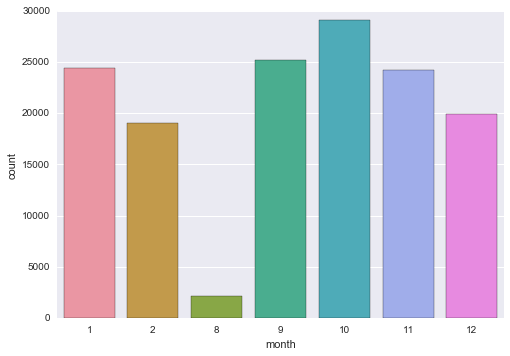

In [48]:
import seaborn as sns
sns.countplot(x='month', data=trips)

It's strange that in the month of August, bike rentals are so low because it's the classical vacation month. Also, we don't have data from March to July. Interestingly, October is the month with most rentals, perhaps because it's the best weather in the Bay Area.

In [56]:
trips_sept_dec = trips[trips.month > 8]

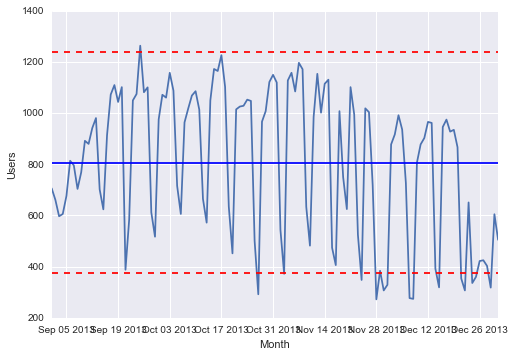

In [90]:
chart = trips_sept_dec.groupby('date').count()['trip_id'].plot()
chart.set(xlabel="Month", ylabel="Users")
chart.axhline(y=trips_sept_dec.groupby('date').count()['trip_id'].mean())
mean_std_plus = trips_sept_dec.groupby('date').count()['trip_id'].mean() + 1.5 * trips_sept_dec.groupby('date').count()['trip_id'].std()
mean_std_minus = trips_sept_dec.groupby('date').count()['trip_id'].mean() - 1.5 * trips_sept_dec.groupby('date').count()['trip_id'].std()
chart.axhline(y=mean_std_plus, color='red', ls='dashed')
chart.axhline(y=mean_std_minus, color='red', ls='dashed')

//anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


[<matplotlib.text.Text at 0x12ef3c240>, <matplotlib.text.Text at 0x12310aeb8>]

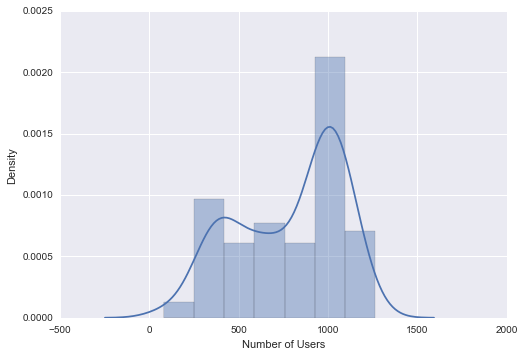

In [75]:
hist_chart = sns.distplot(trips.groupby('date').count()['trip_id'])
hist_chart.set(xlabel="Number of Users", ylabel="Density")